In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from warnings import filterwarnings
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

2024-04-01 17:19:37.053430: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 17:19:37.053580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 17:19:37.252586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
x_train = []
y_train = []
image_size = 256

folderPath = os.path.join('/kaggle/input/x-ray-dataset/normal')
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x_train.append(img)
    y_train.append(0)

folderPath = os.path.join('/kaggle/input/x-ray-dataset/bad')
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x_train.append(img)
    y_train.append(1)


x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train, y_train = shuffle(x_train,y_train, random_state=127)

Train Set


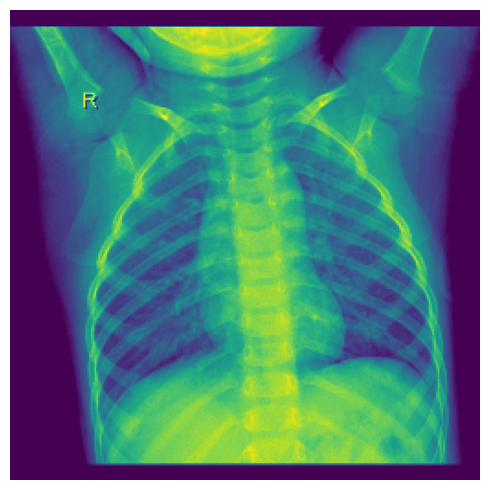

In [10]:
print('Train Set')

plt.figure(figsize=(5,5))


plt.imshow(x_train[0])
plt.axis("off")

plt.tight_layout()

plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,
                                      test_size=0.1)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, MaxPooling2D, Dropout
from keras.layers import Activation, Flatten, BatchNormalization

In [14]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3),
                 activation ='relu', input_shape = (256,256, 1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = 'Adam', metrics = ['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 59, 59, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,730,561 (10.42 MB)

 Trainable params: 2,730,049 (10.41 MB)

 Non-trainable params: 512 (2.00 KB)

In [18]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("kaggle/conv2d_v2_2.keras",
                             monitor="val_accuracy", save_best_only=True,
                             mode="auto", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3,
                              patience = 2, min_delta = 0.001,
                              mode='auto', verbose=1)

In [19]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs = 12, verbose=1, batch_size=32,
                   callbacks=[tensorboard, checkpoint, reduce_lr])

Epoch 1/12
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8653 - loss: 0.4446
Epoch 1: val_accuracy improved from -inf to 0.81049, saving model to kaggle/conv2d_v2_2.keras
236/236 ━━━━━━━━━━━━━━━━━━━━ 2322s 10s/step - accuracy: 0.8655 - loss: 0.4440 - val_accuracy: 0.8105 - val_loss: 1.8496 - learning_rate: 0.0010
Epoch 2/12
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9377 - loss: 0.1897
Epoch 2: val_accuracy improved from 0.81049 to 0.94398, saving model to kaggle/conv2d_v2_2.keras
236/236 ━━━━━━━━━━━━━━━━━━━━ 2330s 10s/step - accuracy: 0.9377 - loss: 0.1896 - val_accuracy: 0.9440 - val_loss: 0.1483 - learning_rate: 0.0010
Epoch 3/12
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9567 - loss: 0.1194
Epoch 3: val_accuracy improved from 0.94398 to 0.95828, saving model to kaggle/conv2d_v2_2.keras
236/236 ━━━━━━━━━━━━━━━━━━━━ 2297s 10s/step - accuracy: 0.9567 - loss: 0.1194 - val_accuracy: 0.9583 - val_loss: 0.1039 - learning_rate: 0.0010
Epoch 4/12
236/236 ━━━━━━

KeyboardInterrupt: 

In [23]:
model.save("kaggle/working/1conv2d_v2.2_last.keras")

In [ ]:
model = tf.keras.models.load_model("drive/MyDrive/x-ray/effnet.keras")

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(7)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history['accuracy']
train_loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
pred = model.predict(x_test)

30/30 [==============================] - 84s 3s/step


In [ ]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support



           0       0.99      0.98      0.98       421

           1       0.98      0.99      0.99       511



    accuracy                           0.98       932

   macro avg       0.98      0.98      0.98       932

weighted avg       0.98      0.98      0.98       932


